# Experiment 5

## a) Consider Titanic dataset & handle the missing values using different methods.
## b) Consider Titanic (or any other dataset) & detect the outliers & handle the outerliers
## c)Consider any relevant dataset and perform Data transformation operations
## d)Consider any relevant dataset and perform Data Integration operations

# a) Consider Titanic dataset & handle the missing values using different methods.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/CSV file/titanic.csv")
df1 = pd.read_csv("D:/CSV file/titanic.csv")
df2 = pd.read_csv("D:/CSV file/titanic.csv")
df3 = pd.read_csv("D:/CSV file/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3.0,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1.0,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,NaN,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1.0,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3.0,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Check missing values

In [3]:
print(df.isnull().sum())

survived         0
pclass           3
sex              0
age              3
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


### Droping Null Values.

In [4]:
df = df.dropna()

In [5]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


### Fill with mean/median (for numbers).



In [6]:
df1['age'] = df1['age'].fillna(df1['age'].mean())

In [7]:
print(df1.isnull().sum())

survived         0
pclass           3
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [8]:
df2['age'] = df2['age'].fillna(df2['age'].median())

In [9]:
print(df2.isnull().sum())

survived         0
pclass           3
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


### Fill with mode/most common (for categories).



In [10]:
df3['embarked'] = df3['embarked'].fillna(df3['embarked'].mode()[0])

### Filling with a label like “Unknown”.

In [11]:
df3['deck'] = df3['deck'].fillna("Unknown")

In [12]:
print(df3.isnull().sum())

survived       0
pclass         3
sex            0
age            3
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


# b) Consider Titanic (or any other dataset) & detect the outliers & handle the outerliers


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

## Useing boxplot to see outliers.



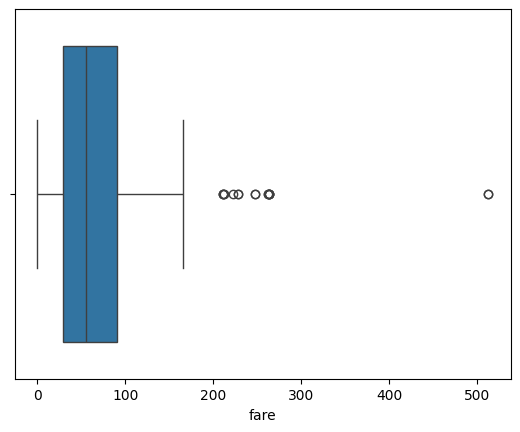

In [14]:
sns.boxplot(x=df['fare'])
plt.show()

## Useing Scatter plot to see outliers.



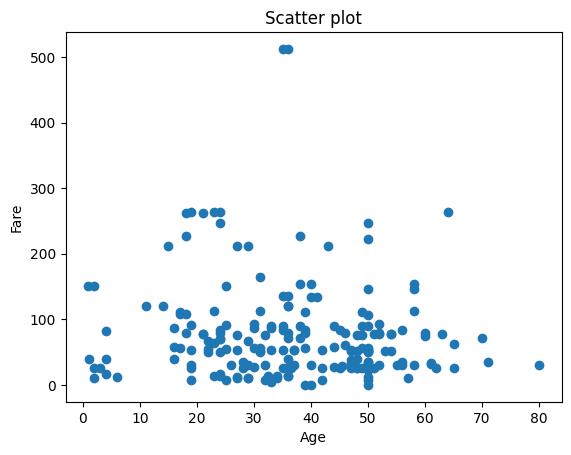

In [15]:
plt.scatter(df['age'], df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Scatter plot")
plt.show()

## Use IQR to calculate range.



In [16]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

## Removing using IQR method.

In [18]:
# Detect outliers
outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Outliers detected:", len(outliers))

Outliers detected: 17


In [19]:
print(outliers.index)
df = df.drop(outliers.index)

Index([ 27,  88, 118, 299, 311, 341, 377, 438, 527, 679, 689, 700, 716, 730,
       737, 742, 779],
      dtype='int64')


In [20]:
outliers = df[(df['fare'] < lower) | (df['fare'] > upper)]
print("Outliers detected:", len(outliers))

Outliers detected: 0


## Replaceing using IQR method

In [21]:
outliers = df2[(df2['fare'] < lower) | (df2['fare'] > upper)]
print("Outliers detected:", len(outliers))
outliers.index

Outliers detected: 20


Index([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679, 689,
       700, 716, 730, 737, 742, 779],
      dtype='int64')

In [22]:
df2['fare'] = df2['fare'].clip(lower, upper)

In [23]:
outliers = df2[(df2['fare'] < lower) | (df2['fare'] > upper)]
print("Outliers detected:", len(outliers))

Outliers detected: 0


## Replacing using Mean Median Mode

In [24]:
outliers = df3[(df3['fare'] < lower) | (df3['fare'] > upper)]
print("Outliers detected:", len(outliers))
outliers.index

Outliers detected: 20


Index([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679, 689,
       700, 716, 730, 737, 742, 779],
      dtype='int64')

In [25]:
# m = np.mean(df3['age'])           # Using Numpy
# m = df3['age'].median()           # Using Median 
# m = df3['embark_town'].mode()     # Mode is used for charecter
m = int(df3['fare'].mean())         # Using Mean
print('mean:', m)
for i in df3['fare']:
    if i < lower or i > upper:
        df3['fare'] = df3['fare'].replace(i, m)

mean: 32


In [26]:
outliers = df3[(df3['fare'] < lower) | (df3['fare'] > upper)]
print("Outliers detected:", len(outliers))

Outliers detected: 0


# c)Consider any relevant dataset and perform data transformation operations

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

### 1. Normalization (scale values between 0-1)

In [28]:
df = df.copy()   # make df an independent DataFrame
scaler = MinMaxScaler()
df.loc[:, 'Fare_Normalized'] = scaler.fit_transform(df[['fare']])

### 2. Standardization (mean=0, std=1)

In [29]:
scalerss = StandardScaler()
df.loc[:, 'Age_Standardized'] = scalerss.fit_transform(df[['age']])

### 3. Encoding categorical variables

In [30]:
encoder = LabelEncoder()
df.loc[:, 'Sex_Encoded'] = encoder.fit_transform(df['sex'])

In [31]:
print(df[['fare', 'Fare_Normalized', 'age', 'Age_Standardized', 'sex', 'Sex_Encoded']].head())

       fare  Fare_Normalized   age  Age_Standardized     sex  Sex_Encoded
1   71.2833         0.432369  38.0          0.039698  female            0
3   53.1000         0.322078  35.0         -0.153889  female            0
6   51.8625         0.314572  54.0          1.072159    male            1
10  16.7000         0.101294   4.0         -2.154283  female            0
21  13.0000         0.078852  34.0         -0.218418    male            1


# d)Consider any relevant dataset and perform Data Integration operations

In [32]:
# Passenger personal info
passenger_info = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['John', 'Mary', 'Alex', 'Sophia'],
    'Age': [22, 38, 26, 35],
    'Sex': ['male', 'female', 'male', 'female']
})

# Ticket and fare info
ticket_info = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2.3101282', '113803'],
    'Fare': [7.25, 71.2833, 7.925, 53.1]
})

# Survival info
survival_info = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Survived': [0, 1, 1, 1],
    'Pclass': [3, 1, 3, 1]
})


### We combine them based on a common key and it can only merge 2 DataFrames at a time

In [33]:
merged1 = pd.merge(passenger_info, ticket_info, on="PassengerId")

titanic_full = pd.merge(merged1, survival_info, on="PassengerId")

print(titanic_full)

   PassengerId    Name  Age     Sex           Ticket     Fare  Survived  \
0            1    John   22    male        A/5 21171   7.2500         0   
1            2    Mary   38  female         PC 17599  71.2833         1   
2            3    Alex   26    male  STON/O2.3101282   7.9250         1   
3            4  Sophia   35  female           113803  53.1000         1   

   Pclass  
0       3  
1       1  
2       3  
3       1  


### Put different datasets data together into one dataset.

In [34]:
titanic_combined = pd.concat([passenger_info, survival_info], axis=0)
print(titanic_combined)

   PassengerId    Name   Age     Sex  Survived  Pclass
0            1    John  22.0    male       NaN     NaN
1            2    Mary  38.0  female       NaN     NaN
2            3    Alex  26.0    male       NaN     NaN
3            4  Sophia  35.0  female       NaN     NaN
0            1     NaN   NaN     NaN       0.0     3.0
1            2     NaN   NaN     NaN       1.0     1.0
2            3     NaN   NaN     NaN       1.0     3.0
3            4     NaN   NaN     NaN       1.0     1.0


### Adding New Attribute(Column)

In [35]:
titanic_full['NewFare'] = titanic_full['Fare'] + 10
titanic_full

,PassengerId,Name,Age,Sex,Ticket,Fare,Survived,Pclass,NewFare
0,1,John,22,male,A/5 21171,7.2500,0,3,17.2500
1,2,Mary,38,female,PC 17599,71.2833,1,1,81.2833
2,3,Alex,26,male,STON/O2.3101282,7.9250,1,3,17.9250
3,4,Sophia,35,female,113803,53.1000,1,1,63.1000


### Adding new Object(Row)

In [36]:
titanic_full.loc[len(titanic_full.index)] = [5,'Luffy',19,'male','56',10,1,1,20]
print(titanic_full)

   PassengerId    Name  Age     Sex           Ticket     Fare  Survived  \
0            1    John   22    male        A/5 21171   7.2500         0   
1            2    Mary   38  female         PC 17599  71.2833         1   
2            3    Alex   26    male  STON/O2.3101282   7.9250         1   
3            4  Sophia   35  female           113803  53.1000         1   
4            5   Luffy   19    male               56  10.0000         1   

   Pclass  NewFare  
0       3  17.2500  
1       1  81.2833  
2       3  17.9250  
3       1  63.1000  
4       1  20.0000  
